In [ ]:
pip install split-folders


In [ ]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/projectsamples/"

In [ ]:
!pip install pillow
from PIL import Image
path = "/content/drive/MyDrive/Colab Notebooks/projectsamples/hfmdsamples/"
img_hfmd = Image.open(path + "HFMD/HFMD_01_01_1.jpg")
print(path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/projectsamples/hfmdsamples/HFMD/HFMD_01_01_1.jpg'

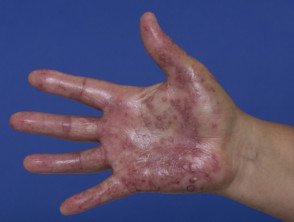

In [ ]:
img_hfmd

/content/drive/MyDrive/Colab Notebooks/projectsamples/other skin disease/


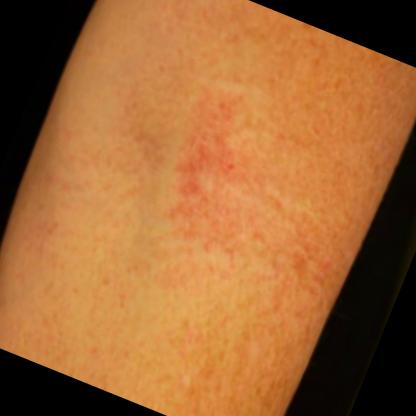

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/projectsamples/other skin disease/"
img_osd = Image.open(path + "1_23_jpg.rf.ca24b91bf4b5eb118b4a15473988078c.jpg")
print(path)
img_osd

In [ ]:
datagen = ImageDataGenerator(

    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',

)

# define classes name
class_names = ['HFMD','OSD']

In [ ]:
# training data
train_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Colab Notebooks/Train",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)

Found 2633 images belonging to 2 classes.


In [ ]:
# test data
test_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Colab Notebooks/Test/",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)

Found 211 images belonging to 2 classes.


In [ ]:
# validation data
valid_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Colab Notebooks/Val/",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)

Found 231 images belonging to 2 classes.


In [ ]:
#Step 3 - Build the model
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = True

In [ ]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(32, activation='relu')(x)  # Additional hidden layer
x = layers.Dropout(0.5)(x)  # Additional dropout layer
x = layers.Dense(16, activation='relu')(x)  # Additional hidden layer
x = layers.Dropout(0.5)(x)  # Additional dropout layer
predictions = layers.Dense(1, activation='sigmoid')(x)

# Create and compile model
model = Model(inputs=resnet_50.input, outputs=predictions)

In [ ]:
#from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
#from keras.optimizers import Adam

In [ ]:
#es=EarlyStopping(monitor='accuracy',verbose=1,patience=7,mode='auto')
#mc=ModelCheckpoint(filepath='/content',monitor='val_accuracy',verbose=1,save_best_only=True)
#lr=ReduceLROnPlateau(monitor='accuracy',verbose=1,patience=5,min_lr=0.001)

In [ ]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)


In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 1.4 MB/s eta 0:00:00


In [ ]:
import visualkeras

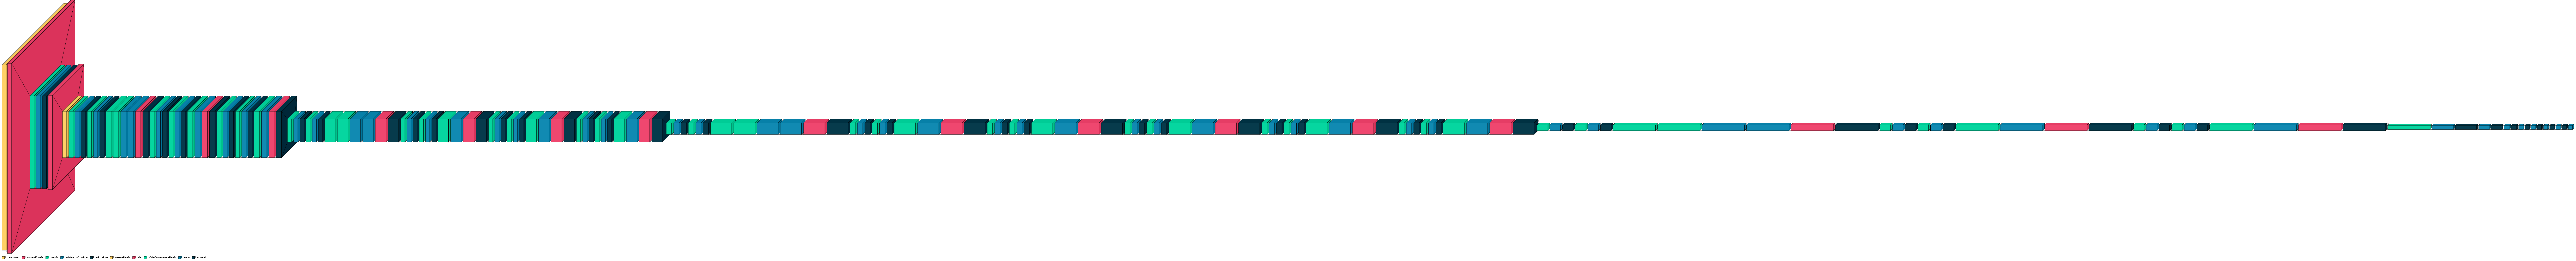

In [ ]:
from tensorflow.keras.utils import plot_model
visualkeras.layered_view(model, legend=True)

In [ ]:
# launch the training
model_history = trainModel(model = model, epochs = 15, optimizer = "Adam")

Epoch 1/15
83/83 [==============================] - 93s 712ms/step - loss: 1.1583 - accuracy: 0.5389 - val_loss: 1.3127 - val_accuracy: 0.4762
Epoch 2/15
83/83 [==============================] - 60s 719ms/step - loss: 0.7004 - accuracy: 0.5868 - val_loss: 0.6983 - val_accuracy: 0.4762
Epoch 3/15
83/83 [==============================] - 58s 692ms/step - loss: 0.6747 - accuracy: 0.5830 - val_loss: 0.6991 - val_accuracy: 0.4762
Epoch 4/15
83/83 [==============================] - 58s 695ms/step - loss: 0.6558 - accuracy: 0.5780 - val_loss: 0.6987 - val_accuracy: 0.4762
Epoch 5/15
83/83 [==============================] - 61s 734ms/step - loss: 0.5953 - accuracy: 0.5834 - val_loss: 0.6967 - val_accuracy: 0.4762
Epoch 6/15
83/83 [==============================] - 58s 694ms/step - loss: 0.5616 - accuracy: 0.5917 - val_loss: 0.6947 - val_accuracy: 0.4762
Epoch 7/15
83/83 [==============================] - 57s 687ms/step - loss: 0.5506 - accuracy: 0.5940 - val_loss: 0.6932 - val_accuracy: 0.4762

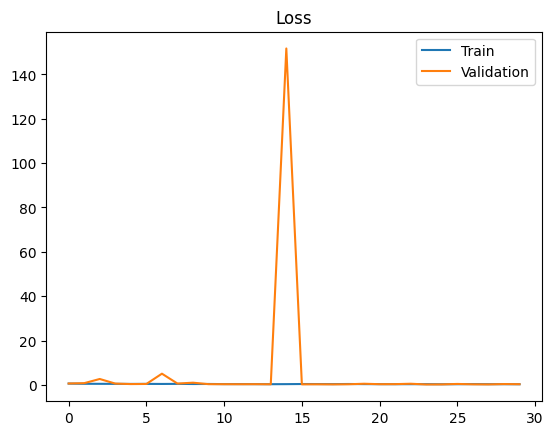

In [ ]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

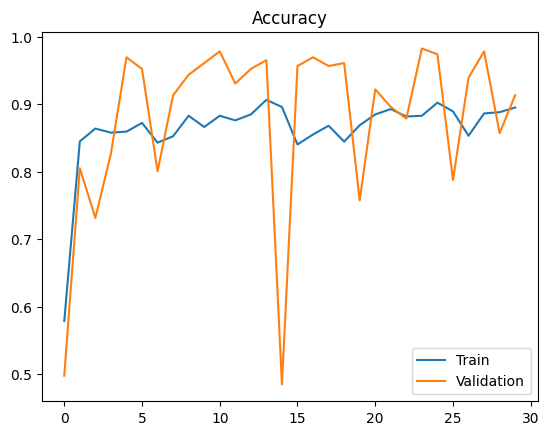

In [ ]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

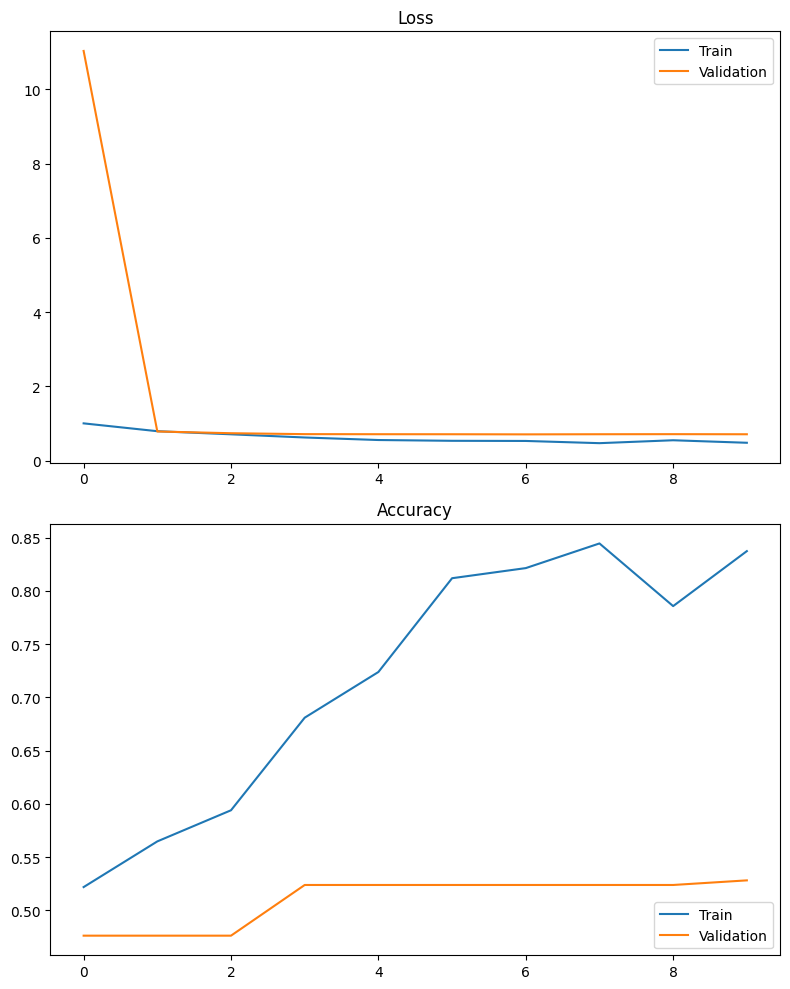

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(8, 10))


# Plot Loss
axs[0].plot(loss_train_curve, label="Train")
axs[0].plot(loss_val_curve, label="Validation")
axs[0].legend(loc='upper right')
axs[0].set_title("Loss")

# Plot Accuracy
axs[1].plot(acc_train_curve, label="Train")
axs[1].plot(acc_val_curve, label="Validation")
axs[1].legend(loc='lower right')
axs[1].set_title("Accuracy")

plt.tight_layout()
plt.show()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

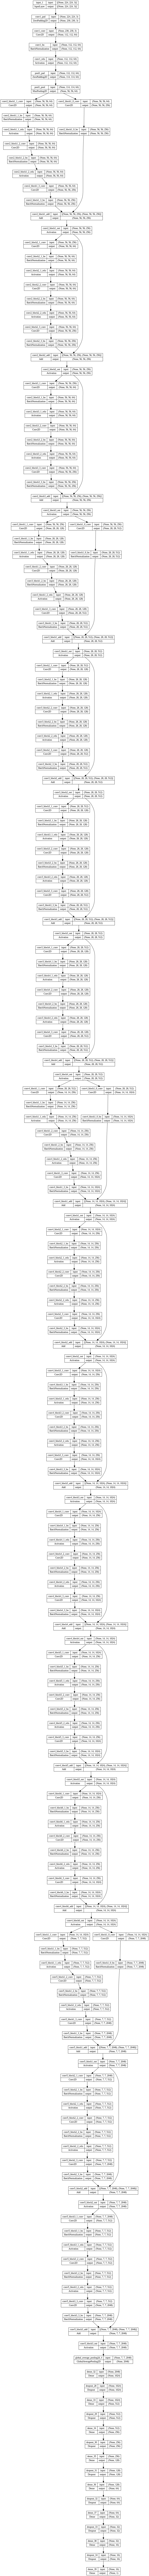

In [ ]:
model.summary()
# plot model architecture
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='ResNet.png')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

7/7 [==============================] - 5s 604ms/step - loss: 0.3301 - accuracy: 0.8815
The test loss is:  0.3301222622394562
The best accuracy is:  88.15165758132935


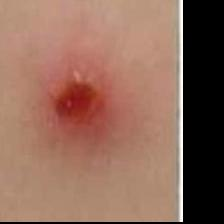

In [ ]:
img = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/Colab Notebooks/Test/OSD/Copy of CHP_04_04_3.jpg", target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array])
img

In [ ]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 0s 25ms/step
[[0.]]


In [ ]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[0]


In [ ]:
# transform classes number into classes name
class_names[class_id.item()]

'HFMD'

In [ ]:
model.save('HFMD_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('HFMD_prediction_model.h5')
n=model.predict(img_array)
class_id = np.argmax(n, axis = 1)
print(class_id)

1/1 [==============================] - 1s 1s/step
[0]


In [ ]:
class_names[class_id.item()]

'HFMD'

In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

In [ ]:
!pip install scikit-learn


7/7 [==============================] - 6s 505ms/step


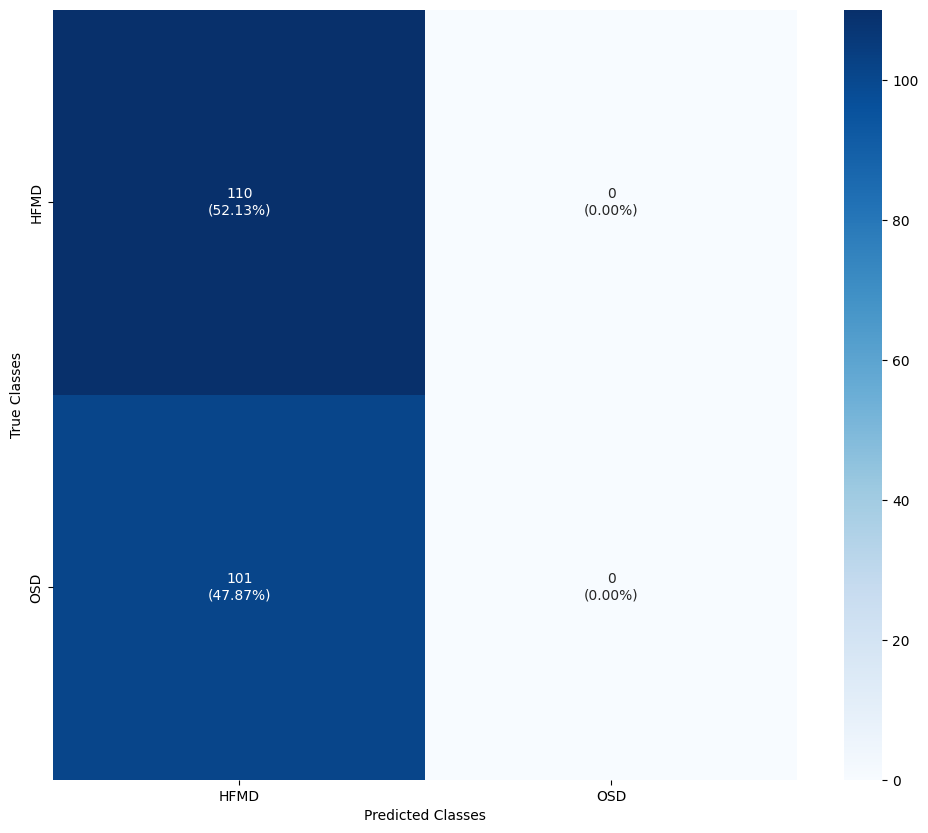

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Make predictions using the trained model on the test data
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Step 2: Calculate confusion matrix, precision, recall, and F1 score
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(2, 2)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="Blues", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()


In [ ]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

        HFMD       0.52      1.00      0.69       110
         OSD       0.00      0.00      0.00       101

    accuracy                           0.52       211
   macro avg       0.26      0.50      0.34       211
weighted avg       0.27      0.52      0.36       211



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


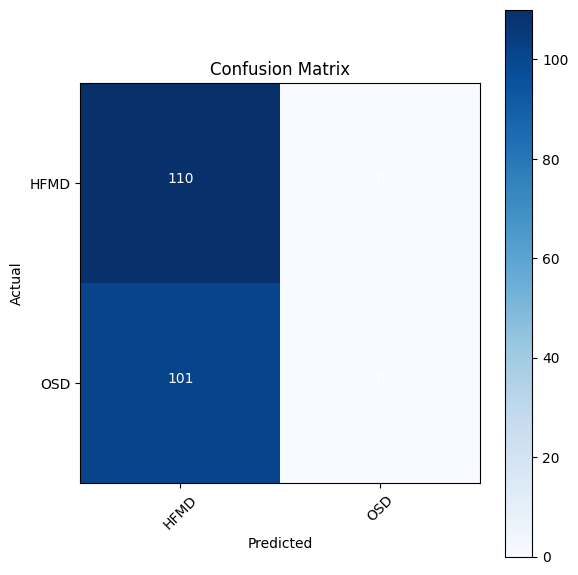

In [ ]:
classes = ["HFMD", "OSD"]
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
 for j in range(cm.shape[1]):
  plt.text(j, i, format(cm[i, j], "d"), horizontalalignment="center",color="white")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

In [ ]:
# Importing necessary libraries
'''
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
'''
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

'''
# Define paths
path = "/content/drive/MyDrive/Colab Notebooks/projectsamples/"
path_hfmd = "/content/drive/MyDrive/Colab Notebooks/projectsamples/hfmdsamples/"
path_osd = "/content/drive/MyDrive/Colab Notebooks/projectsamples/other skin disease/"

# Load sample images
img_hfmd = Image.open(path_hfmd + "enteroviral-hand-blisters-019__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDE5XQ.JPG.jpg")
img_osd = Image.open(path_osd + "1_23_jpg.rf.ca24b91bf4b5eb118b4a15473988078c.jpg")

# Display paths
print("HFMD Path:", path_hfmd)
print("OSD Path:", path_osd)

# Initialize ImageDataGenerator
datagen = ImageDataGenerator()

# Define classes
class_names = ['hfmd', 'osd']

# Training data
train_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Colab Notebooks/train/",
    classes=class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

# Test data
test_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Colab Notebooks/test/",
    classes=class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

# Validation data
valid_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Colab Notebooks/validation/",
    classes=class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

'''

# Load VGG16 model
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze layers
for layer in vgg16.layers:
    layer.trainable = True

# Add custom layers on top of VGG16
x = vgg16.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1, activation='softmax')(x)

# Create and compile model
model = Model(inputs=vgg16.input, outputs=predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training function
def trainModel(model, epochs,optimizer):
    batch_size = 32
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

'''
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Unfreeze some top layers for fine-tuning
for layer in vgg16.layers[-4:]:
    layer.trainable = True

# Implement ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Compile model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with fine-tuning and callbacks
model_history = trainModel(model=model, epochs=10)
'''


# Launch training
model_history = trainModel(model=model, epochs=25,optimizer="Adam")
#model_history = trainModel(model = model, epochs = 10)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/25
76/76 [==============================] - 96s 938ms/step - loss: 0.6328 - accuracy: 0.8166 - val_loss: 0.7022 - val_accuracy: 0.5000
Epoch 2/25
76/76 [==============================] - 61s 802ms/step - loss: 0.5610 - accuracy: 0.8166 - val_loss: 0.7323 - val_accuracy: 0.5000
Epoch 3/25
76/76 [==============================] - 60s 790ms/step - loss: 0.5434 - accuracy: 0.8166 - val_loss: 0.7431 - val_accuracy: 0.5000
Epoch 4/25
 8/76 [==>...........................] - ETA: 1:01 - loss: 0.4595 - accuracy: 0.8203

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

In [ ]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

In [ ]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()